# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [10]:
import numpy as np
import pandas as pd
from itertools import chain
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
from io import BytesIO
from zipfile import ZipFile
import requests

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [12]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [13]:
zipfile.extractall()

In [38]:
! ls ml-latest-small/

links.csv  movies.csv  ratings.csv  README.txt	tags.csv


In [96]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [49]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any columns is null

In [15]:
# write pandas code here
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

# Q 2 (.25 point) Check datatype of columns

In [16]:
# write pandas code here
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [50]:
# write pandas code here

movie['genres'] = movie['genres'].str.split("|")
unique_genre = set(np.array(list(chain(*movie['genres']))))
print(unique_genre)



{'Horror', 'Comedy', 'Documentary', 'Western', 'Fantasy', 'Action', 'Crime', 'Animation', 'Mystery', 'Film-Noir', 'Children', 'Romance', '(no genres listed)', 'IMAX', 'Musical', 'Sci-Fi', 'Adventure', 'Drama', 'Thriller', 'War'}


# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [51]:
# write pandas code here ------ This takes a while

def buildColumn(row):
    for genre in unique_genre:
        row[genre] = bool(re.search(str(genre) , str(row['genres'])))
        
    return row
        
        
movie = movie.apply(buildColumn , axis=1)

movie.sample(3)

,movieId,title,genres,Horror,Comedy,Documentary,Western,Fantasy,Action,Crime,...,Children,Romance,(no genres listed),IMAX,Musical,Sci-Fi,Adventure,Drama,Thriller,War
8840,132335,Breathe (2014),[Drama],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2503,3345,"Charlie, the Lonesome Cougar (1967)","[Adventure, Children]",False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
5404,25753,Greed (1924),[Drama],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [52]:
# write pandas code here
def buildDate(row):
    match = re.search(r'\((\d{4}?)\)', row['title'])
    
    if bool(match):
        row['year'] = int(match.group(1))
        
    else:
        row['year'] = 0
    
    return row

movie = movie.apply(buildDate , axis=1)
movie['year'] = movie['year'].astype(int)
movie.sample(3)

,movieId,title,genres,Horror,Comedy,Documentary,Western,Fantasy,Action,Crime,...,Romance,(no genres listed),IMAX,Musical,Sci-Fi,Adventure,Drama,Thriller,War,year
6284,47774,"Icicle Thief, The (Ladri di saponette) (1989)","[Comedy, Fantasy]",False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1989
5045,7884,Highway 61 (1991),[Comedy],False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1991
7715,90374,Martha Marcy May Marlene (2011),"[Drama, Thriller]",False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,2011


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

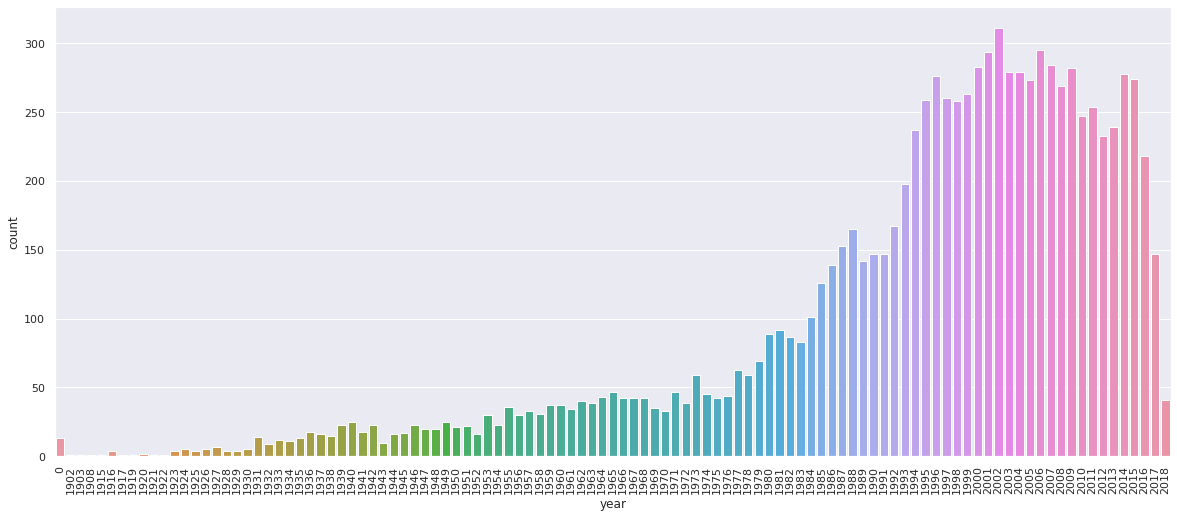

In [53]:
# write code here.
sns.set(rc={'figure.figsize':(20,8.27)})
bp = sns.countplot(x='year' , data=movie.sort_values(by=['year']))
_ = bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)

There certianly looks like there was a growth trend.  At least up until the early 2000's where we may or may not have hit a peak.  

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

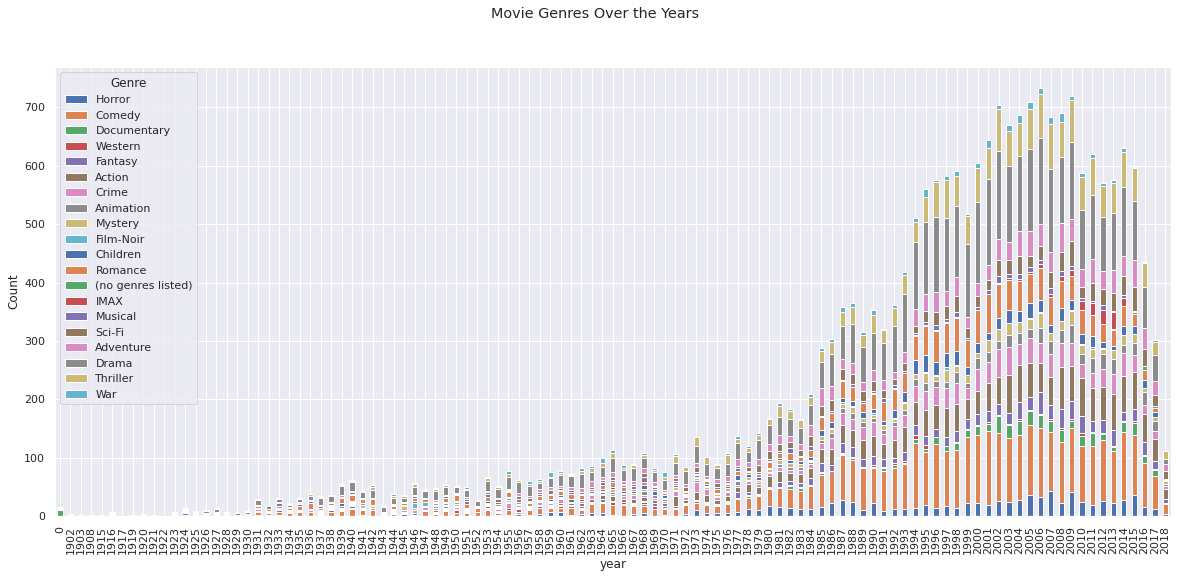

In [54]:
#pandas technically uses matplotlib under the hood, so hopefully this counts.
plot_df = movie.groupby(['year']).sum()
plot_df = plot_df[unique_genre]
plot_df.plot.bar(stacked=True);
plt.suptitle("Movie Genres Over the Years");
plt.legend(title="Genre",fancybox=True);
plt.ylabel('Count');

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [55]:
def buildTitle(row):
    match = re.search(r'\((\d{4}?)\)', row['title'])
    
    if bool(match):
        row['movie_title'] = str(row['title']).replace(str(match[0]), '')
        
    else:
        row['movie_title'] = row['title']
        
    return row
    
movie = movie.apply(buildTitle, axis=1)
movie = movie.drop(columns=['title'])
movie.sample(3)

,movieId,genres,Horror,Comedy,Documentary,Western,Fantasy,Action,Crime,Animation,...,(no genres listed),IMAX,Musical,Sci-Fi,Adventure,Drama,Thriller,War,year,movie_title
2255,2992,"[Horror, Thriller]",True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,1986,Rawhead Rex
8990,139385,"[Adventure, Drama]",False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,2015,The Revenant
9708,187541,"[Action, Adventure, Animation, Children]",False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,2018,Incredibles 2


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the year in different genres. Write your observation in no more than 2 lines.

In [77]:
title_len = movie.groupby('year').mean(len(str(['movie_title'])))
title_len = title_len.drop(columns=['movieId'])

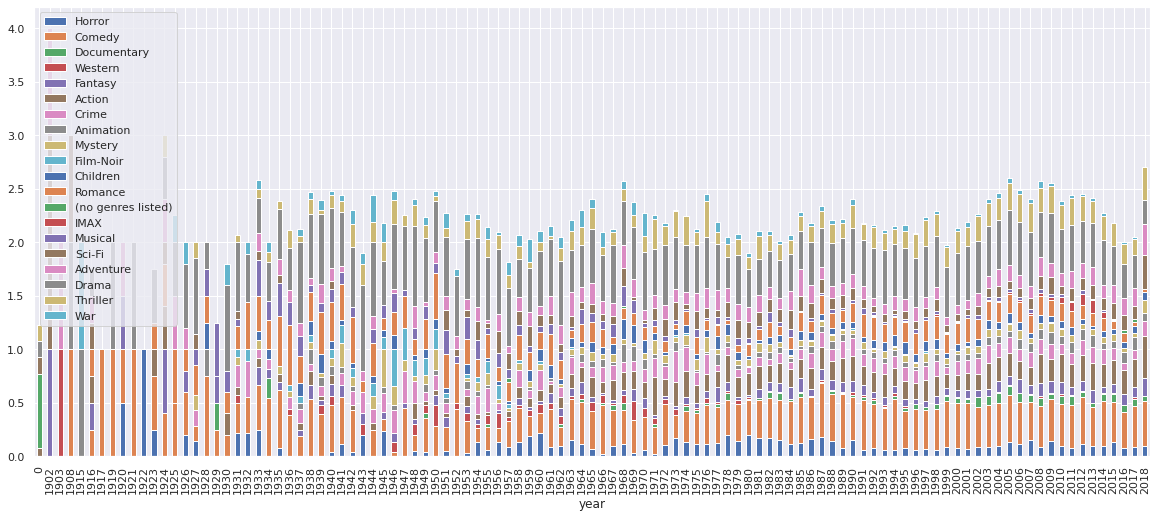

In [79]:
# Write code here.

title_len.sample(3)

sns.set(rc={'figure.figsize':(20,8.27)})
title_len.plot(kind='bar', stacked=True);


#######NOTE################
# The 'means' observed are unfortunately the sum of genre divided by the total in the year.
# So the numbers aren't accurate, but the relative proportions are in tact so it should tell the same story.  
# (I couldn't seem to get it to just divied by the genre volumes)  It is close to proportion but a moive can be 
# in more than one genre, so it won't have a flot top

Romance, Comedy, and Action seem to have the longer titles most of the time.  Not surprising as they are the most popular.  